# Project Overview


### 1. Import Python Packages

In [1]:
from tensorflow import keras 
import keras_preprocessing
from keras_preprocessing import image
import tensorflow as tf
import natsort
from natsort import natsorted
from glob import glob
from skimage import img_as_float32
import imageio
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

### 2. Image Preprocessing
#### 2.1 Get Dataset Path

In [4]:
# get training images and corresponding masks path
TRAIN_DATA_PATH = list(zip(
    natsorted(glob(f'./dataset/train/*.png')),
    natsorted(glob(f'./dataset/train_labels/*.png')),
))

VAL_DATA_PATH = list(zip(
    natsorted(glob(f'./dataset/val/*.png')),
    natsorted(glob(f'./dataset/val_labels/*.png')),
))

TEST_DATA_PATH= list(zip(
    natsorted(glob(f'./dataset/test/*.png')),
    natsorted(glob(f'./dataset/test_labels/*.png')),
))

In [5]:
images = []
SIZE = (512,512)
for msk_path,_ in tqdm(TRAIN_DATA_PATH, 'Loading Masks'):
    # load images as float32 and store it in an array
    image = img_as_float32(cv.imread(msk_path, cv.IMREAD_COLOR))
    # downsample the input image to 512 x 512 x 3
    image = cv.resize(image,SIZE)
    # convert images to color images since opencv reads images grayscale
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    # store all images
    images.append(image)
np.array(images)

Loading Masks: 100%|██████████| 131/131 [00:24<00:00,  5.35it/s]


array([[[[0.52115506, 0.54090077, 0.5603756 ],
         [0.50912917, 0.53212166, 0.54793125],
         [0.5050552 , 0.52544177, 0.54090077],
         ...,
         [0.11169088, 0.19492477, 0.08617757],
         [0.0771087 , 0.09928852, 0.06244178],
         [0.13874818, 0.14782242, 0.17742693]],

        [[0.5092961 , 0.52564263, 0.5415901 ],
         [0.4953585 , 0.5184743 , 0.53457415],
         [0.5019608 , 0.52514935, 0.5415174 ],
         ...,
         [0.09488843, 0.17141347, 0.08655389],
         [0.08931999, 0.1711931 , 0.06086893],
         [0.08810198, 0.10410373, 0.06552651]],

        [[0.50764513, 0.5170533 , 0.43197367],
         [0.44107807, 0.46391815, 0.4470027 ],
         [0.5202356 , 0.53870714, 0.53380805],
         ...,
         [0.25046855, 0.32423323, 0.19351628],
         [0.15163012, 0.2565248 , 0.12915842],
         [0.11597572, 0.21357687, 0.09802982]],

        ...,

        [[0.17770159, 0.19665188, 0.26448277],
         [0.41006413, 0.43442827, 0.43355122]

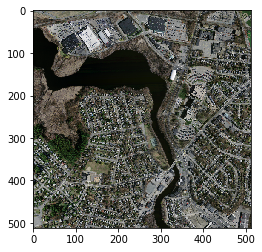

In [8]:
plt.imshow(images[0])

In [9]:
class BuildingsSegmentation(object):
    
    def __init__(self, IMAGES = None):
        self.SIZE = (512,512)
        self.IMAGES = []
        
    def get_images(self, PATH):
        """
        This method loads images 
        :returns: images
        """
        
        # read all images and store them in an array. 
        # borrowed from https://realpython.com/storing-images-in-python/
        for img_path, _ in tqdm(PATH, "Loading images"):
            # load images as float32 and store it in an array
            image = img_as_float32(cv.imread(img_path, cv.IMREAD_COLOR))
            # downsample the input image to 512 x 512 x 3
            image = cv.resize(image, self.SIZE)
            # convert images to color images since opencv reads images grayscale
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            # store all images
            self.IMAGES.append(image)
       
        IMGS = np.array(self.IMAGES)
        
        assert IMGS.shape == (len(self.IMAGES), self.SIZE[0], self.SIZE[1], 3)

        return IMGS
            
            
    def get_masks(self, name):
        pass
            

buildings_segmentation = BuildingsSegmentation()
images = buildings_segmentation.get_images(TRAIN_DATA_PATH)


Loading images: 100%|██████████| 131/131 [00:18<00:00,  7.08it/s]
